In [1]:
import numpy as np
import pandas as pd
from mlxtend.plotting import plot_decision_regions

In [3]:
df=pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
df.shape

(10, 3)

<AxesSubplot:xlabel='X1', ylabel='X2'>

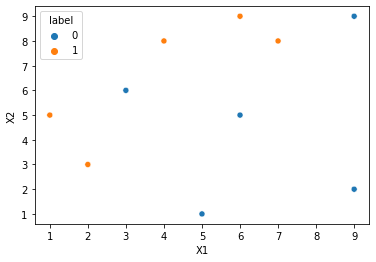

In [8]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [9]:
df['weights']=1/df.shape[0]

In [10]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
dt1=DecisionTreeClassifier(max_depth=1)

In [18]:
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [19]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

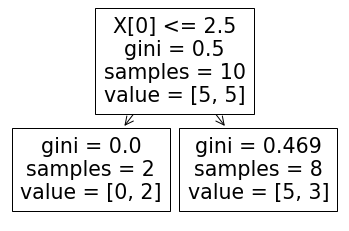

In [20]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<AxesSubplot:>

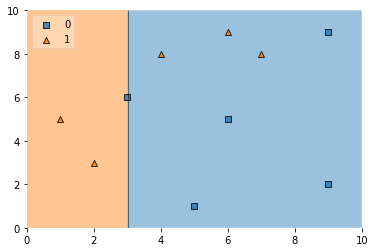

In [22]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [23]:
df['y_pred']=dt1.predict(X)

In [24]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [26]:
def calculate_model_weights(error):
    return 0.5*np.log((1-error)/(error))

In [27]:
alpha1 = calculate_model_weights(0.3)
alpha1

0.42364893019360184

In [28]:
def update_row_weights(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)        

In [29]:
df['updated_weights'] = df.apply(update_row_weights,axis=1)

In [30]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [31]:
df['updated_weights'].sum()

0.9165153319682015

In [32]:
df['normalized_weights'] = df['updated_weights']/df['updated_weights'].sum()

In [33]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [38]:
df['normalized_weights'].sum()

1.0

In [39]:
df['cumsum_upper']=np.cumsum(df['normalized_weights'])

In [40]:
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized_weights']

In [41]:
df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [45]:
def create_new_dataset(df):
    indices=[]
    for i in range(df.shape[0]):
        a=np.random.random()
        for index,row in df.iterrows():
            if row['cumsum_upper'] > a  and a > row['cumsum_lower']:
                indices.append(index)
    return indices

In [46]:
index_values = create_new_dataset(df)
index_values

[3, 0, 5, 6, 6, 2, 7, 7, 7, 6]

In [47]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [48]:
second_df

,X1,X2,label,weights
3,4,8,1,0.1
0,1,5,1,0.1
5,6,9,1,0.1
6,6,5,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
6,6,5,0,0.1


In [49]:
dt2=DecisionTreeClassifier(max_depth=1)

In [52]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [53]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(167.4, 163.07999999999998, 'X[1] <= 7.0\ngini = 0.48\nsamples = 10\nvalue = [4, 6]'),
 Text(83.7, 54.360000000000014, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

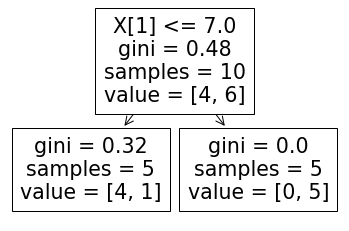

In [54]:
plot_tree(dt2)

<AxesSubplot:>

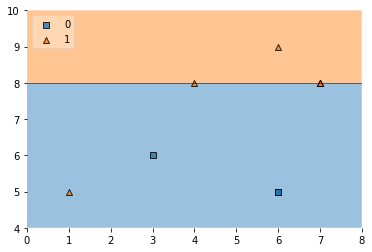

In [55]:
plot_decision_regions(X,y,clf=dt2,legend=2)

In [56]:
second_df['y_pred']=dt2.predict(X)

In [57]:
second_df

,X1,X2,label,weights,y_pred
3,4,8,1,0.1,1
0,1,5,1,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,0
6,6,5,0,0.1,0
2,3,6,0,0.1,0
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
6,6,5,0,0.1,0


In [58]:
alpha2=calculate_model_weights(0.1)

In [59]:
alpha2

1.0986122886681098

In [62]:
def update_row_weights(row,alpha=1.09):
    if row['label'] == row['y_pred']:
        return row['weights'] * np.exp(-alpha)
    else:
        return row['weights'] * np.exp(alpha)

In [63]:
second_df['updated_weights']=second_df.apply(update_row_weights,axis=1)

In [64]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
3,4,8,1,0.1,1,0.033622
0,1,5,1,0.1,0,0.297427
5,6,9,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622
6,6,5,0,0.1,0,0.033622
2,3,6,0,0.1,0,0.033622
7,7,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
6,6,5,0,0.1,0,0.033622


In [65]:
second_df['normalized_weights'] = second_df['updated_weights']/second_df['updated_weights'].sum()

In [66]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
3,4,8,1,0.1,1,0.033622,0.056034
0,1,5,1,0.1,0,0.297427,0.495694
5,6,9,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034
2,3,6,0,0.1,0,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034
6,6,5,0,0.1,0,0.033622,0.056034


In [67]:
second_df['normalized_weights'].sum()

0.9999999999999999

In [72]:
second_df['cumsum_upper'] = np.cumsum(second_df['normalized_weights'])

In [73]:
second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['normalized_weights']

In [74]:
second_df[['X1','X2','label','weights','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weights,y_pred,updated_weights,cumsum_lower,cumsum_upper
3,4,8,1,0.1,1,0.033622,0.000000,0.056034
0,1,5,1,0.1,0,0.297427,0.056034,0.551728
5,6,9,1,0.1,1,0.033622,0.551728,0.607762
6,6,5,0,0.1,0,0.033622,0.607762,0.663796
6,6,5,0,0.1,0,0.033622,0.663796,0.719830
2,3,6,0,0.1,0,0.033622,0.719830,0.775864
7,7,8,1,0.1,1,0.033622,0.775864,0.831898
7,7,8,1,0.1,1,0.033622,0.831898,0.887932
7,7,8,1,0.1,1,0.033622,0.887932,0.943966
6,6,5,0,0.1,0,0.033622,0.943966,1.000000


In [75]:
index_values = create_new_dataset(second_df)

In [77]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [78]:
third_df

,X1,X2,label,weights
7,7,8,1,0.1
7,7,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1


In [81]:
dt3 = DecisionTreeClassifier(max_depth=1)

X=third_df.iloc[:,0:2].values
y=third_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

C:\ProgramData\Anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:315: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels, **contour_kwargs)


<AxesSubplot:>

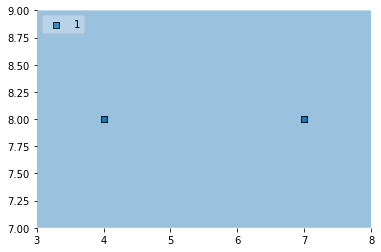

In [82]:
plot_decision_regions(X,y,clf=dt3,legend=2)

In [83]:
third_df['y_pred'] = dt3.predict(X)

In [84]:
third_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
7,7,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1


In [85]:
alpha3 = calculate_model_weights(0.7)
alpha3

-0.4236489301936017

In [86]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


## Prediction

In [100]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [101]:
dt2.predict(query)

array([0], dtype=int64)

In [102]:
dt3.predict(query)

array([1], dtype=int64)

In [103]:
alpha1*(1) + alpha2*(-1) + alpha3*(1)

-1.0986122886681096

In [105]:
np.sign(1.09)

1.0

In [106]:
query2 = np.array([4,8]).reshape(1,2)
dt1.predict(query2)

array([0], dtype=int64)

In [107]:
dt2.predict(query2)

array([1], dtype=int64)

In [108]:
dt3.predict(query2)

array([1], dtype=int64)

In [109]:
alpha1*(-1)+alpha2*(1)+alpha3*(1)

0.2513144282809062

In [110]:
np.sign(0.25)

1.0

## Scikit-Learn Implementation

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [112]:
np.random.seed(42)
X, y = make_circles(n_samples=500, factor=0.1, noise=0.35, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

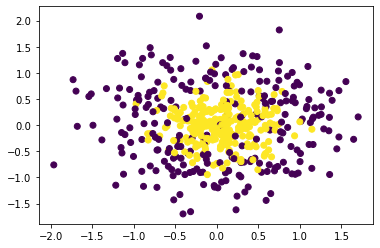

In [113]:
plt.scatter(X[:,0],X[:,1],c=y)

In [114]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
abc=AdaBoostClassifier()
np.mean(cross_val_score(abc,X,y,cv=10,scoring='accuracy'))

0.786

In [115]:
abc.fit(X,y)

AdaBoostClassifier()

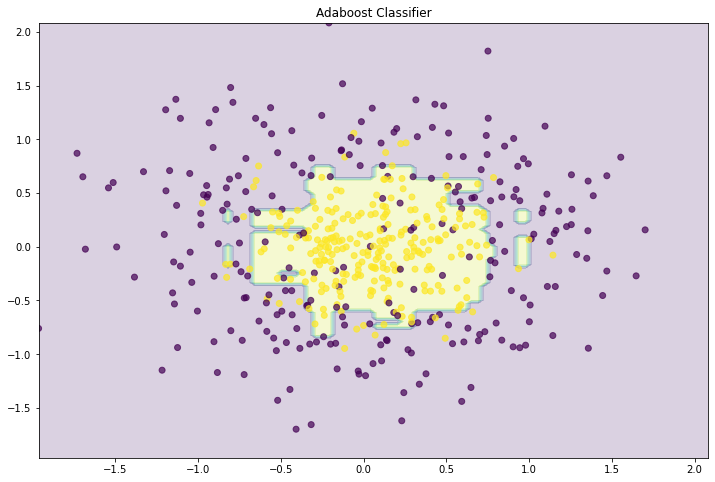

In [123]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(X.min(), X.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', alpha=.7)
    plt.title("Adaboost Classifier")
    plt.show()
    
plot_decision_boundary(abc)

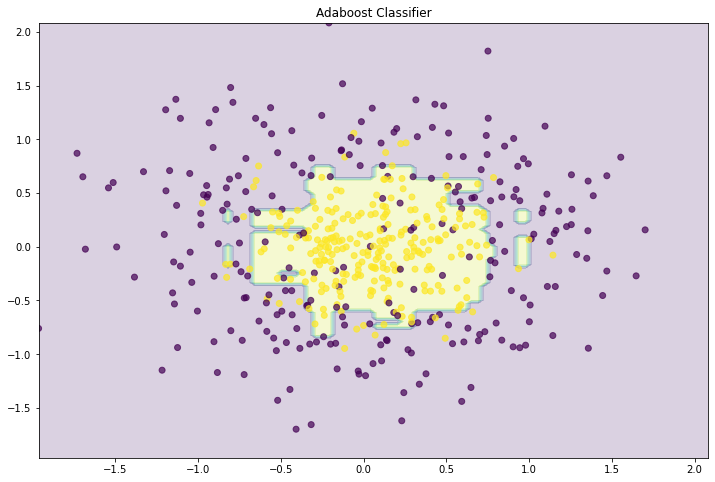

In [117]:
abc = AdaBoostClassifier(n_estimators=1500,learning_rate=0.1)
abc.fit(X,y)
plot_decision_boundary(abc)

## Hyper Parameter Tunning Using GridSearchCV

In [118]:
from sklearn.model_selection import GridSearchCV
grid=dict()
grid['n_estimators']=[10,50,100,500]
grid['learning_rate']=[0.0001,0.001,0.01,0.1,1.0]
grid['algorithm']=['SAMME','SAMME.R']

grid_search = GridSearchCV(estimator=AdaBoostClassifier(),param_grid=grid,n_jobs=-1,scoring='accuracy',cv=10)
grid_result = grid_search.fit(X,y)
print("Best : %f using %s" %(grid_result.best_score_,grid_result.best_params_))

Best : 0.832000 using {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 500}


In [119]:
abc2 = AdaBoostClassifier(algorithm='SAMME',learning_rate=0.1,n_estimators=500)
np.mean(cross_val_score(abc2,X,y,cv=10,scoring='accuracy'))

0.8320000000000001

In [124]:
abc2.fit(X,y)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1, n_estimators=500)

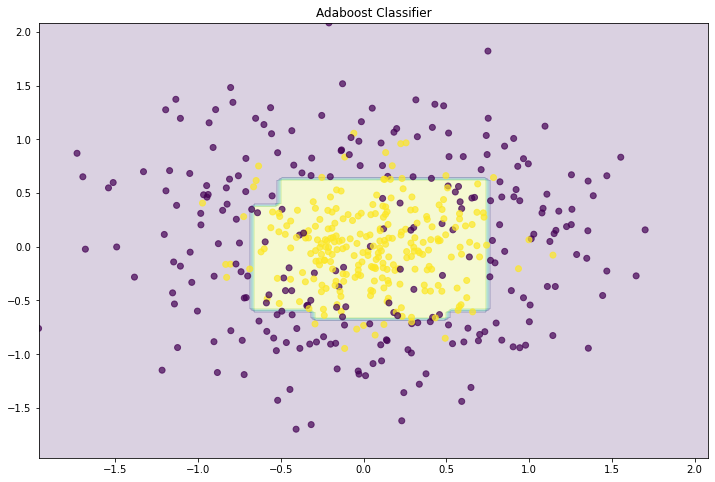

In [125]:
plot_decision_boundary(abc2)

## Bagging VS Boosting

|parameter|Bagging|Boosting|
|---------|--------|-------|
|model|LBHV|HBLV|
|flow|Parallel|Sequential|
|Weights|Equal|Not Equal|